In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from matplotlib.dates import date2num
from utide import solve, reconstruct
import numpy as np
import pandas as pd
from windrose import WindroseAxes
import hvplot.xarray
from eofs.xarray import Eof
import glob

In [3]:
files=glob.glob('5km-radius/GOM-1-*2012*')
for file in files:
    os.system('ncrename -v depth,z ' + file + ' new_'+ file)
    

ncrename: overwrite new_5km-radius/GOM-1-2012-01.nc (y/n)? 

In [ ]:
filenm='5km-radius/GOM-2-1993-05.nc'
txt='ncrename -v depth,z ' + filenm + ' new_'+ filenm
txt
os.system(txt)

ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? ncrename: overwrite new_5km-radius/GOM-2-1993-05.nc (y/n)? 
ncrename: ERROR nco_fl_overwrite_prm() reports 10 failed attempts to obtain valid interactive input. Assuming non-interactive shell and exiting.


256

In [16]:

vel=xr.open_dataset('new_5km-radius/GOM-1-2012-07.nc').load()
vel.close()
vel

<xarray.Dataset>
Dimensions:     (ocean_time: 744, node: 23, depth: 30)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2012-07-01T01:00:00 ... 2012-08-01
Dimensions without coordinates: node, depth
Data variables:
    lon         (node) float64 -94.13 -94.16 -94.13 ... -94.18 -94.15 -94.13
    lat         (node) float64 29.52 29.53 29.54 29.54 ... 29.6 29.6 29.6 29.61
    z           (depth, node) float64 -12.45 -12.0 -11.68 ... -0.1291 -0.1256
    temp        (ocean_time, depth, node) float64 31.18 31.14 ... 31.29 31.27
    salt        (ocean_time, depth, node) float64 28.39 28.35 ... 31.56 31.58
    w           (ocean_time, depth, node) float64 -1.187e-05 ... 1.548e-06
    u           (ocean_time, depth, node) float64 -0.01313 -0.00571 ... 0.09478
    v           (ocean_time, depth, node) float64 -0.02526 -0.01184 ... 0.02699
Attributes: (12/33)
    file:              /scratch/user/d.kobashi/projects/hindcasts/projects/tx...
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Texas-Louisiana shelf hindcast with dyes
    var_info:          varinfo.dat
    ...                ...
    compiler_flags:    -fp-model fast -heap-arrays -ip -O3
    tiling:            010x012
    ana_file:          /scratch/user/d.kobashi/source_code/COAWST/Functionals...
    CPP_options:       TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_SPFLUX,...
    history:           Sun Feb 20 15:39:44 2022: ncrename -v depth,z 5km-radi...
    NCO:               netCDF Operators version 5.0.6 (Homepage = http://nco....

In [17]:

vel['speed']=np.sqrt(vel.u**2+vel.v**2)
angles=np.arctan2(vel['u'],vel['v'])
vel['direction']=(angles + 2 * np.pi) % (2 * np.pi)*(180/np.pi)
vel['ocean_depth']= vel.z.min(dim='depth')
#vel=vel.assign_coords(dyp=vel.z)
vel

<xarray.Dataset>
Dimensions:      (ocean_time: 744, node: 23, depth: 30)
Coordinates:
  * ocean_time   (ocean_time) datetime64[ns] 2012-07-01T01:00:00 ... 2012-08-01
Dimensions without coordinates: node, depth
Data variables:
    lon          (node) float64 -94.13 -94.16 -94.13 ... -94.18 -94.15 -94.13
    lat          (node) float64 29.52 29.53 29.54 29.54 ... 29.6 29.6 29.6 29.61
    z            (depth, node) float64 -12.45 -12.0 -11.68 ... -0.1291 -0.1256
    temp         (ocean_time, depth, node) float64 31.18 31.14 ... 31.29 31.27
    salt         (ocean_time, depth, node) float64 28.39 28.35 ... 31.56 31.58
    w            (ocean_time, depth, node) float64 -1.187e-05 ... 1.548e-06
    u            (ocean_time, depth, node) float64 -0.01313 -0.00571 ... 0.09478
    v            (ocean_time, depth, node) float64 -0.02526 -0.01184 ... 0.02699
    speed        (ocean_time, depth, node) float64 0.02847 0.01314 ... 0.09855
    direction    (ocean_time, depth, node) float64 207.5 205.8 ... 70.97 74.1
    ocean_depth  (node) float64 -12.45 -12.0 -11.68 ... -7.427 -7.618 -7.411
Attributes: (12/33)
    file:              /scratch/user/d.kobashi/projects/hindcasts/projects/tx...
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Texas-Louisiana shelf hindcast with dyes
    var_info:          varinfo.dat
    ...                ...
    compiler_flags:    -fp-model fast -heap-arrays -ip -O3
    tiling:            010x012
    ana_file:          /scratch/user/d.kobashi/source_code/COAWST/Functionals...
    CPP_options:       TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_SPFLUX,...
    history:           Sun Feb 20 15:39:44 2022: ncrename -v depth,z 5km-radi...
    NCO:               netCDF Operators version 5.0.6 (Homepage = http://nco....

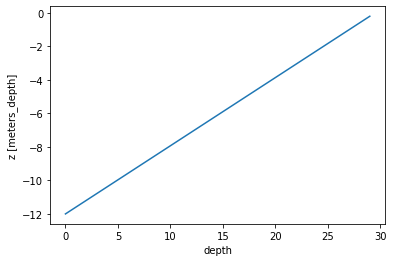

In [18]:
vel.isel(node=1).z.plot()

In [1]:
node=4
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, sharey=True, sharex=True,  figsize=(17, 7))
vel.isel(node=node).salt.plot(x='ocean_time',y='depth',ax=ax0)
vel.isel(node=node).temp.plot(x='ocean_time',y='depth',ax=ax1)
vel.isel(node=node).u.plot(x='ocean_time',y='depth',ax=ax2)
vel.isel(node=node).v.plot(x='ocean_time',y='depth',ax=ax3)

NameError: name 'plt' is not defined

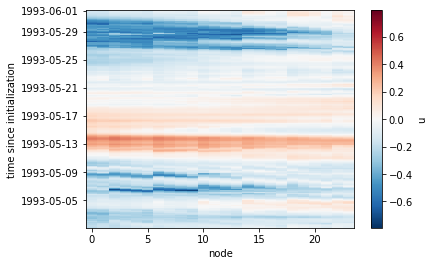

In [109]:
vel.mean(dim='depth').u.plot()

In [119]:
solver = Eof(vel.mean(dim='depth').v)

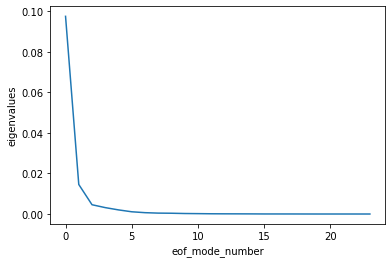

In [126]:
(solver.eigenvalues().plot())


In [128]:
solver.eofs().isel(mode=0)

<xarray.DataArray 'eofs' (node: 24)>
array([-0.27683426, -0.26102021, -0.2409707 , -0.26880745, -0.25494635,
       -0.22419263, -0.22529663, -0.2460845 , -0.23815579, -0.21018183,
       -0.20193998, -0.21481989, -0.21053954, -0.18681971, -0.1747015 ,
       -0.1804937 , -0.18010546, -0.1613011 , -0.1482265 , -0.14656342,
       -0.14714492, -0.13781077, -0.11372581, -0.11268019])
Coordinates:
    mode     int64 0
  * node     (node) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Attributes:
    long_name:  empirical_orthogonal_functions

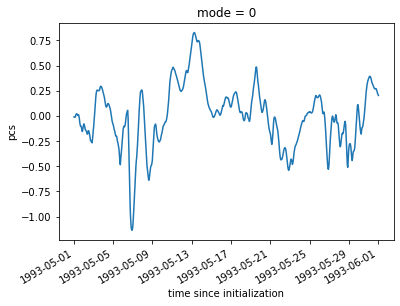

In [122]:
solver.pcs().isel(mode=0).plot()



In [51]:
s.cumsum()/s.sum()

array([0.53731994, 0.59174943, 0.63837502, 0.67162794, 0.70238944,
       0.72904954, 0.75162644, 0.77279263, 0.79321398, 0.81310735,
       0.83176938, 0.8481361 , 0.86418015, 0.87959325, 0.89419881,
       0.90813816, 0.92177388, 0.93464343, 0.94716767, 0.95927592,
       0.97046228, 0.98079867, 0.99074781, 1.        ])

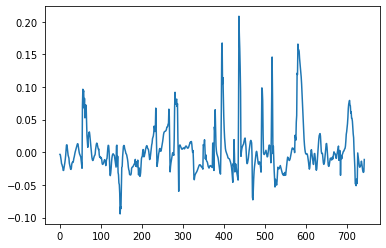

In [53]:
plt.plot(UU[:,1])

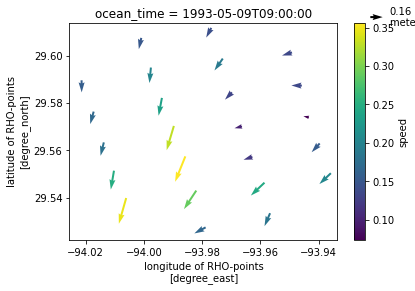

In [103]:

vel.isel(depth=3,ocean_time=200).plot.quiver(x='lon',y='lat' ,u='u', v='v', hue='speed')

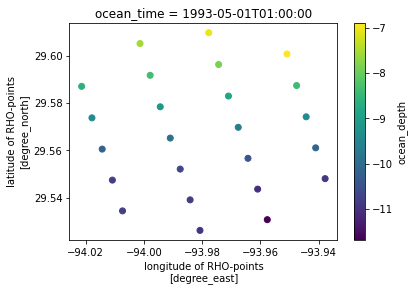

In [15]:
vel.isel(ocean_time=0,depth=0).plot.scatter(x='lon',y='lat', hue='ocean_depth')

In [32]:
depth=2
xr.cov(vel.isel(depth=depth).u,vel.isel(depth=depth).u,dim='ocean_time')


<xarray.DataArray 'u' (node: 24)>
array([0.01051784, 0.00962896, 0.01073109, 0.00950149, 0.00900679,
       0.00858024, 0.00881684, 0.00784489, 0.00721329, 0.0061336 ,
       0.00596571, 0.00507496, 0.00481397, 0.0041571 , 0.00428792,
       0.00361179, 0.0035758 , 0.00340925, 0.00347702, 0.00278626,
       0.002366  , 0.00220055, 0.00237236, 0.00212311])
Dimensions without coordinates: node

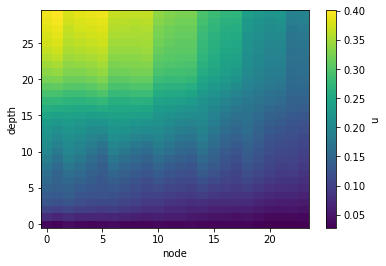

In [35]:
vel.u.std(dim='ocean_time').plot(x='node')


In [20]:
tmp.isel(depth=0).hvplot.contourf(z='u',x='lon',y='lat')

Invoked as dynamic_operation(numpy.datetime64('1993-05-01T01:00:00.000000000'))


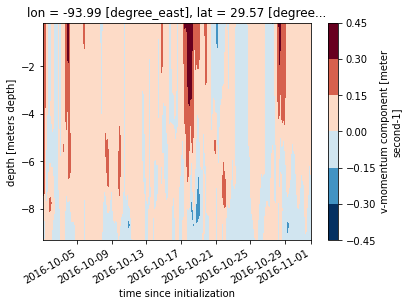

In [7]:
vel.v.squeeze().plot.contourf(x='ocean_time',y='depth')

(-94.55, -93.75)

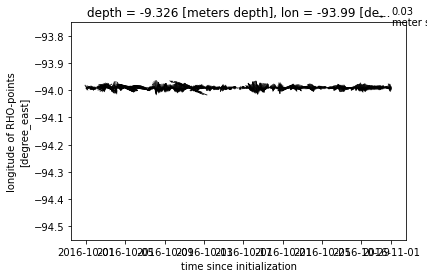

In [8]:
vel.isel(depth=0).squeeze().plot.quiver(x='ocean_time',y='lon',u='u',v='v')
plt.ylim(-94.55,-93.75)

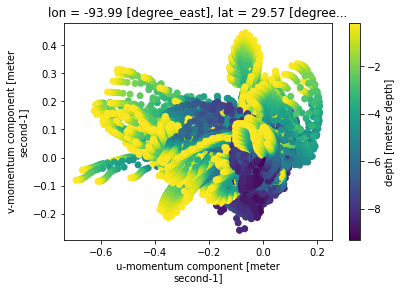

In [9]:
vel.squeeze().plot.scatter(x='u',y='v',hue='depth')

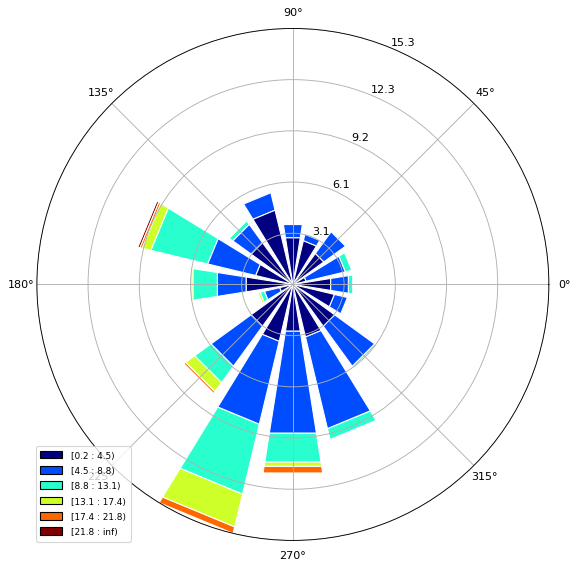

In [12]:
idepth=1
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(vel.isel(depth=idepth).direction.squeeze(), 100*vel.isel(depth=idepth).speed.squeeze(), normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [13]:

time=date2num(pd.to_datetime(vel.ocean_time).to_pydatetime())
u=vel.u.isel(depth=idepth).squeeze().values
v=vel.v.isel(depth=idepth).squeeze().values

coef = solve(time, u-u.mean(), v-v.mean(),
             lat=vel.lat.values,
             nodal=True,
             trend=True,
             method='ols',#'robust',#'ols',
             conf_int='linear',Rayleigh_min=0.95)

print(coef.keys())

In [22]:
coef.name

array(['MM', 'K1', 'MSF', 'UPS1', '2Q1', 'ALP1', 'Q1', 'NO1', 'J1', 'O1',
       'EPS2', 'OO1', 'ETA2', 'MO3', 'L2', 'S2', 'MU2', 'M4', 'M3', 'MK3',
       'SN4', 'N2', 'MN4', 'SK3', 'M2', 'S4', '2MN6', '2SM6', '2MS6',
       '2SK5', 'M6', 'MS4', '3MK7', 'M8', '2MK5'], dtype=object)

In [23]:
tide = reconstruct(time, coef)

prep/calcs ... done.


Text(0.5, 1.0, 'Residue')

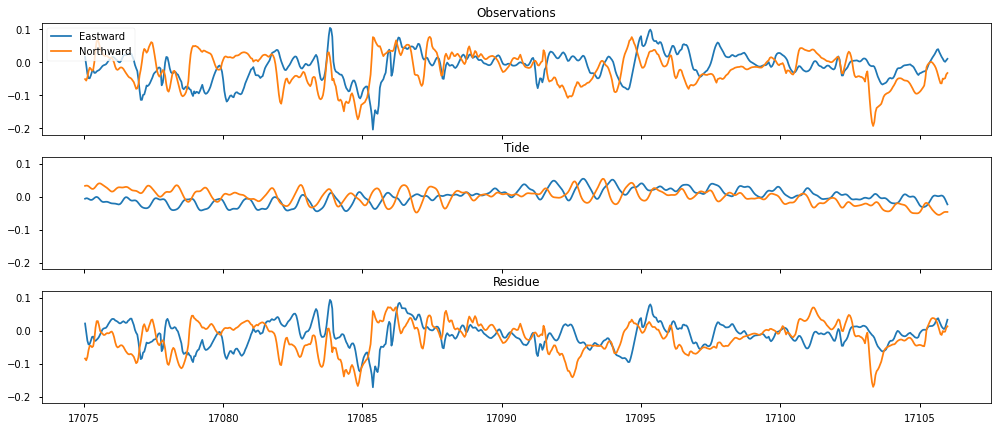

In [24]:
from matplotlib import style

style.use('seaborn-notebook')
t=time
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True,  figsize=(17, 7))

ax0.plot(t, u, label='Eastward')
ax0.plot(t, v, label='Northward')
ax0.legend(numpoints=1, loc='upper left')
ax0.set_title('Observations')


ax1.plot(t, tide['u'] )
ax1.plot(t, tide['v'])
ax1.set_title('Tide')
#ax1.legend(numpoints=1, loc='upper left')

ax2.plot(t, u-tide['u'])
ax2.plot(t, v-tide['v'])
ax2.set_title('Residue')

In [86]:
vel.isel(depth=idepth).u.squeeze().to_dataframe().u

ocean_time
2016-10-01 01:00:00    0.016321
2016-10-01 02:00:00   -0.001507
2016-10-01 03:00:00   -0.015791
2016-10-01 04:00:00   -0.013794
2016-10-01 05:00:00   -0.009241
                         ...   
2016-10-31 20:00:00    0.010432
2016-10-31 21:00:00    0.004128
2016-10-31 22:00:00    0.001444
2016-10-31 23:00:00    0.005825
2016-11-01 00:00:00    0.009646
Name: u, Length: 744, dtype: float64

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
uu=vel.isel(depth=idepth).v.squeeze().to_dataframe().v
decomposition = seasonal_decompose(uu, model='additive')


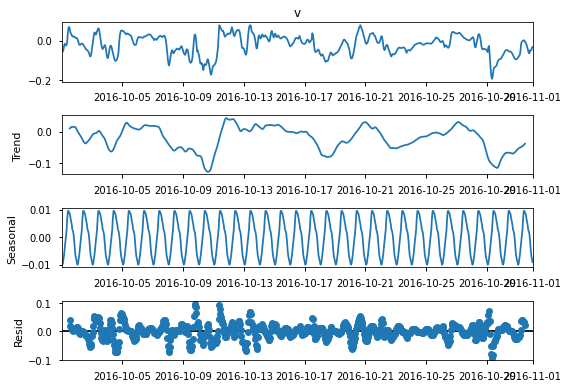

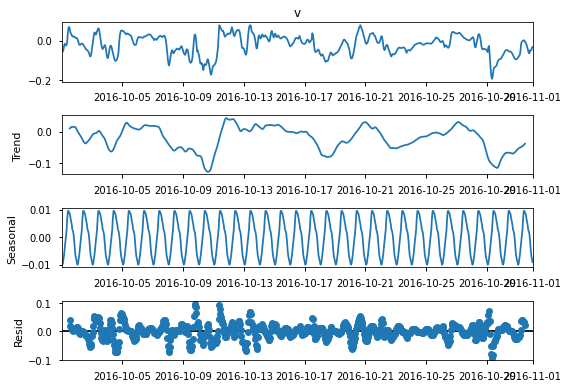

In [26]:
decomposition.plot()